In [1]:
#Step 1: load the data into R 
data=read.table("../datasets//RNAseq//multicell_rnaseq.tpm",header=TRUE,sep='\t',row.names=1)

In [2]:
#Use the 'head' command to examine the structure of your data matrix. 
head(data)

,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,⋯,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
ENSG00000242268.2,1.44,0.02,0.12,1.41,0.00,0.60,0.00,0.29,0.00,0.05,⋯,0.74,0.00,0.14,0.00,0.02,0.00,0.00,0.00,0.00,0.00
ENSG00000167578.12,46.45,1.85,19.95,9.46,2.67,2.25,5.04,13.60,59.20,1.16,⋯,21.47,44.18,13.72,7.31,0.31,4.15,30.42,8.26,0.76,3.38
ENSG00000270112.2,0.27,0.30,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,⋯,1.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000078237.4,45.71,1.25,28.88,7.91,0.09,29.66,16.45,7.11,10.03,0.03,⋯,5.18,26.87,14.56,17.76,0.38,4.58,7.07,7.47,2.86,9.02
ENSG00000263642.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000225275.4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
#Use the nrow and ncol commands to calculate the dimensions of your data matrix 
num_genes=nrow(data)
#use the print command to print the variables you generated above 
print(num_genes)

num_samples=ncol(data)
print(num_samples)

[1] 57820
[1] 410


In [4]:
#Step 2 : We are interested in genes that are differentially expressed across samples, so we can exclude genes that have 0 TPM
#in all samples -- these are not of interest. use the rowSums command to find such genes 
not_expressed=which(rowSums(data)==0)
#How many genes does this filter exclude? 
num_not_expressed=length(not_expressed)
print(num_not_expressed)
#Finally, remove them from the data matrix
data=data[-not_expressed,]
#Sanity check -- the matrix dimensionality should decrease 
print(nrow(data))

[1] 2153
[1] 55667


In [6]:
#Step 3: We compute asinh(tpm) to normalize the data 
#TODO: more information on why we need to do this -- definitely not intuitive so worth explaning well! 
data=asinh(data)

In [8]:
#Step 4: Load the batches file that provides metadata annotations for each sample
batches=read.table("../datasets//RNAseq/rnaseq_batches.txt",header=TRUE,sep='\t')
head(batches)

Sample,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES-derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,Blood,Blood,Lymphoblastoid


In [11]:
#Step 5: Perform principal component analysis on the data to check for obvious batch effects and any other
# odd clustering patterns 
data.pca=prcomp(t(data),center=FALSE,scale=FALSE)

 [1] 90.8840257  2.3693035  1.2355088  0.8974723  0.7388744  0.6299035
 [7]  0.4999875  0.4344433  0.3168944  0.2782143  0.2670001  0.2259364
[13]  0.2049894  0.1841944  0.1649156  0.1536320  0.1384590  0.1302459
[19]  0.1271354  0.1188645


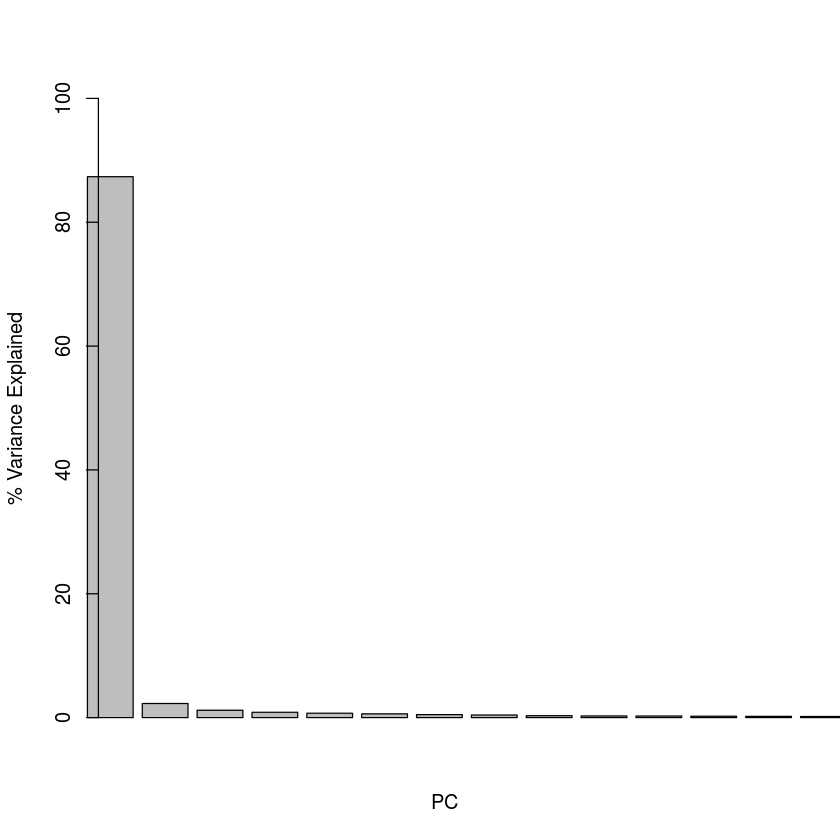

In [16]:
#plot the amount of variance explained by the first 20 principal components 
barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),width=1,xlim=c(1,15),ylim=c(0,100),xlab="PC",ylab="% Variance Explained")
print(100*data.pca$sdev[1:20]^2/sum(data.pca$sdev[1:20]^2))

In [47]:
# Define your color palette if you don't like the built-in one in R (this step is optional)
# Use hex-codes to map to colors 
cbPalette <- c('#0000FF','#00008B','#8B4726','#EE7942','#8B7765',
               '#548B54','#CD6889','#FFFF00','#EE4000','#3A5FCD',
               '#000080','#32CD32','#20B2AA','#EE9572','#CDBE70',
               '#8B008B','#68838B','#8B8970','#8B3A3A','#8A8A8A',
               '#ADFF2F','#FF3030','#EEC900','#00B2EE','#9BCD9B')

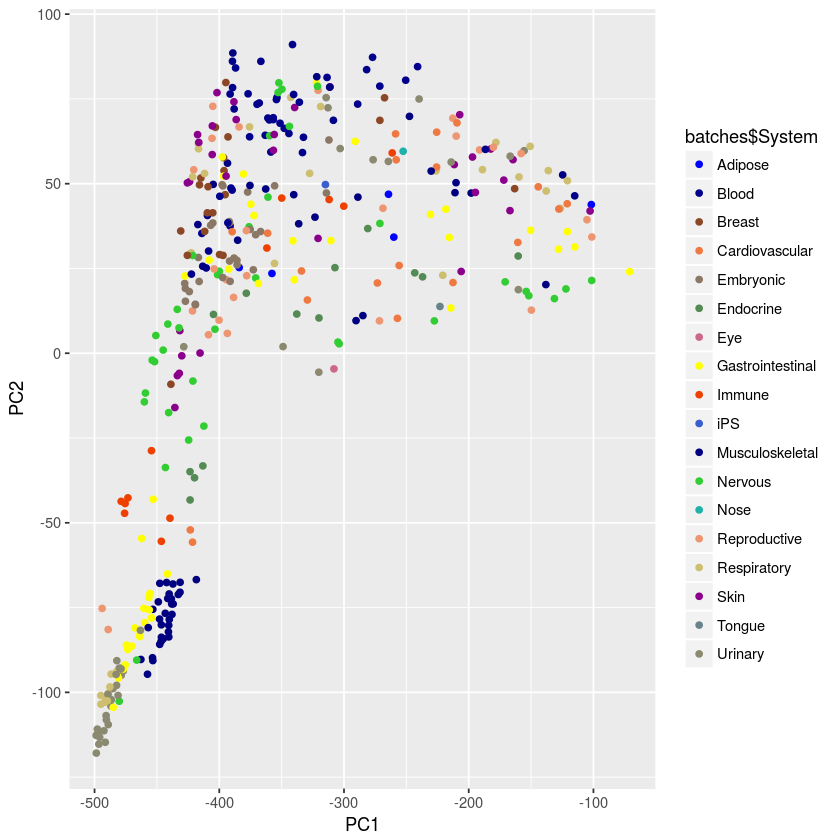

In [52]:
#plot combinations of PC's 1 - 3, since these explain the vast majority of the variance (~94%)
ggplot(data.pca$x,
       aes(x=data.pca$x[,c(1)],
           y=data.pca$x[,c(2)],
           colour=batches$System))+
geom_point()+
xlab("PC1")+
ylab("PC2")+
scale_colour_manual(values=cbPalette)


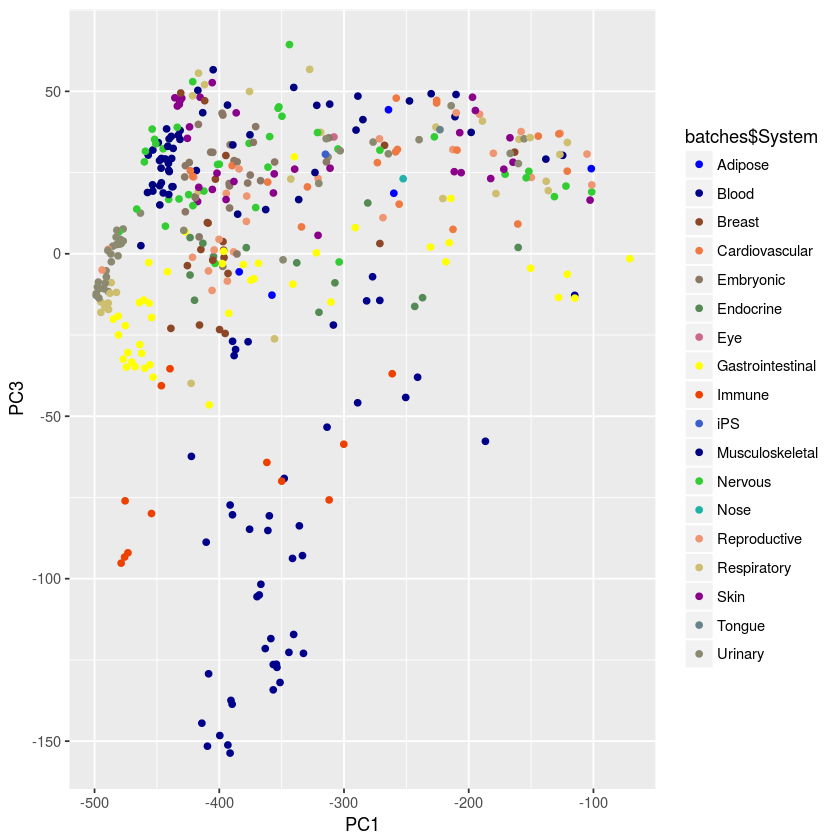

In [53]:
ggplot(data.pca$x,
       aes(x=data.pca$x[,c(1)],
           y=data.pca$x[,c(3)],
           colour=batches$System))+
geom_point()+
xlab("PC1")+
ylab("PC3")+
scale_colour_manual(values=cbPalette)


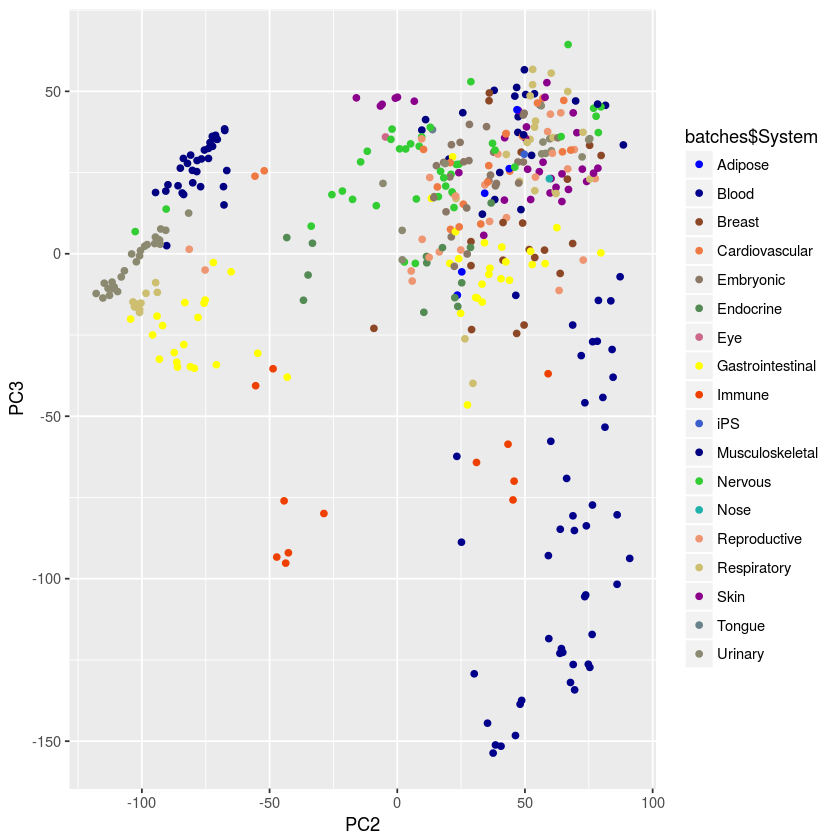

In [54]:
ggplot(data.pca$x,
       aes(x=data.pca$x[,c(2)],
           y=data.pca$x[,c(3)],
           colour=batches$System))+
geom_point()+
xlab("PC2")+
ylab("PC3")+
scale_colour_manual(values=cbPalette)

In [58]:
#Step 6: Perform surrogate variable analysis to check for any variables that explain variation in the data set
#but are not included in the batches file 
library(sva)
#Define model to include variables we expect to correlate 
# with differential gene expression (i.e. System)
# organ & cell type are correlated with system, so we avoid including them in the regression model 
mod1=model.matrix(~0+System,data=batches)
#Define the null model 
mod0=model.matrix(~1,data=batches)
#convert data to matrix format (it is currently in data frame)
sva.vars=sva(as.matrix(data),mod1,mod0)

Number of significant surrogate variables is:  32 
Iteration (out of 5 ):1  2  3  4  5  

In [61]:
# Verify that the surrogate variables are not correlated with the main explanatory variable by performing a linear regression.



In [57]:
#Remove surrogate variables from data 


,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,⋯,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
ENSG00000242268.2,1.1610137,0.01999867,0.1197139,1.143781,0.00000000,0.5688249,0.000000,0.2860817,0.000000,0.04997919,⋯,0.685128,0.000000,0.1395467,0.000000,0.01999867,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000167578.12,4.5316395,1.37446823,3.6870039,2.943001,1.70858121,1.5501580,2.320253,3.3045659,4.774140,0.99011173,⋯,3.760346,4.481547,3.3133273,2.687036,0.30523802,2.130465,4.108518,2.808216,0.701128,1.932221
ENSG00000270112.2,0.2668227,0.29567305,0.0000000,0.000000,0.00000000,0.0000000,0.000000,0.2474665,0.000000,0.00000000,⋯,1.009556,0.000000,0.0000000,0.000000,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237.4,4.5155839,1.04759301,4.0565961,2.765247,0.08987894,4.0832306,3.494395,2.6595585,3.001204,0.02999550,⋯,2.347142,3.984504,3.3726024,3.570888,0.37140239,2.226557,2.653972,2.708493,1.773220,2.895650
ENSG00000263642.1,0.0000000,0.00000000,0.0000000,0.000000,0.00000000,0.0000000,0.000000,0.0000000,0.000000,0.00000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000225275.4,0.0000000,0.00000000,0.0000000,0.000000,0.00000000,0.0000000,0.000000,0.0000000,0.000000,0.00000000,⋯,0.000000,0.000000,0.0000000,0.000000,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Re-run PCA to observe how the data has been cleaned up from surrogate variables & batch effects 